In [1]:
from examples.util.getDataset import getDataset
from examples.util.plotting import plot_w
from examples.util.test_fns import *
from sparse_rf.util import *
from sparse_rf.modules import make_A
from sparse_rf.algs import shrimp, l2, l1, sindy
from functools import partial
import matplotlib.pyplot as plt

In [31]:
fn = fn4
q = 2
d = 10
m = 200

In [43]:
Xtr, Xte, Ytr, Yte = getDataset(fn, d=d, m=m)
best_model, train_mses, val_mses, lengths = shrimp(Xtr, Ytr, orderCands=[q], verbose=0, N=1000)
w_shrimp = np.zeros(2*best_model.W.shape[0])
w_shrimp[best_model.id_list] = best_model.w
Atr = make_A(Xtr, best_model.W)
w_l2 = l2(Atr, Ytr)
Ate = make_A(Xte, best_model.W)
err_shrimp = np.sum((Yte-Ate@w_shrimp)**2)/len(Yte)
err_l2 = np.sum((Yte-Ate@w_l2)**2)/len(Yte)

In [44]:
print("Min l2: {}".format(err_l2))
print("SHRIMP: {}".format(err_shrimp))

Min l2: 0.3367702361631969
SHRIMP: 1.7225702694248822e-06


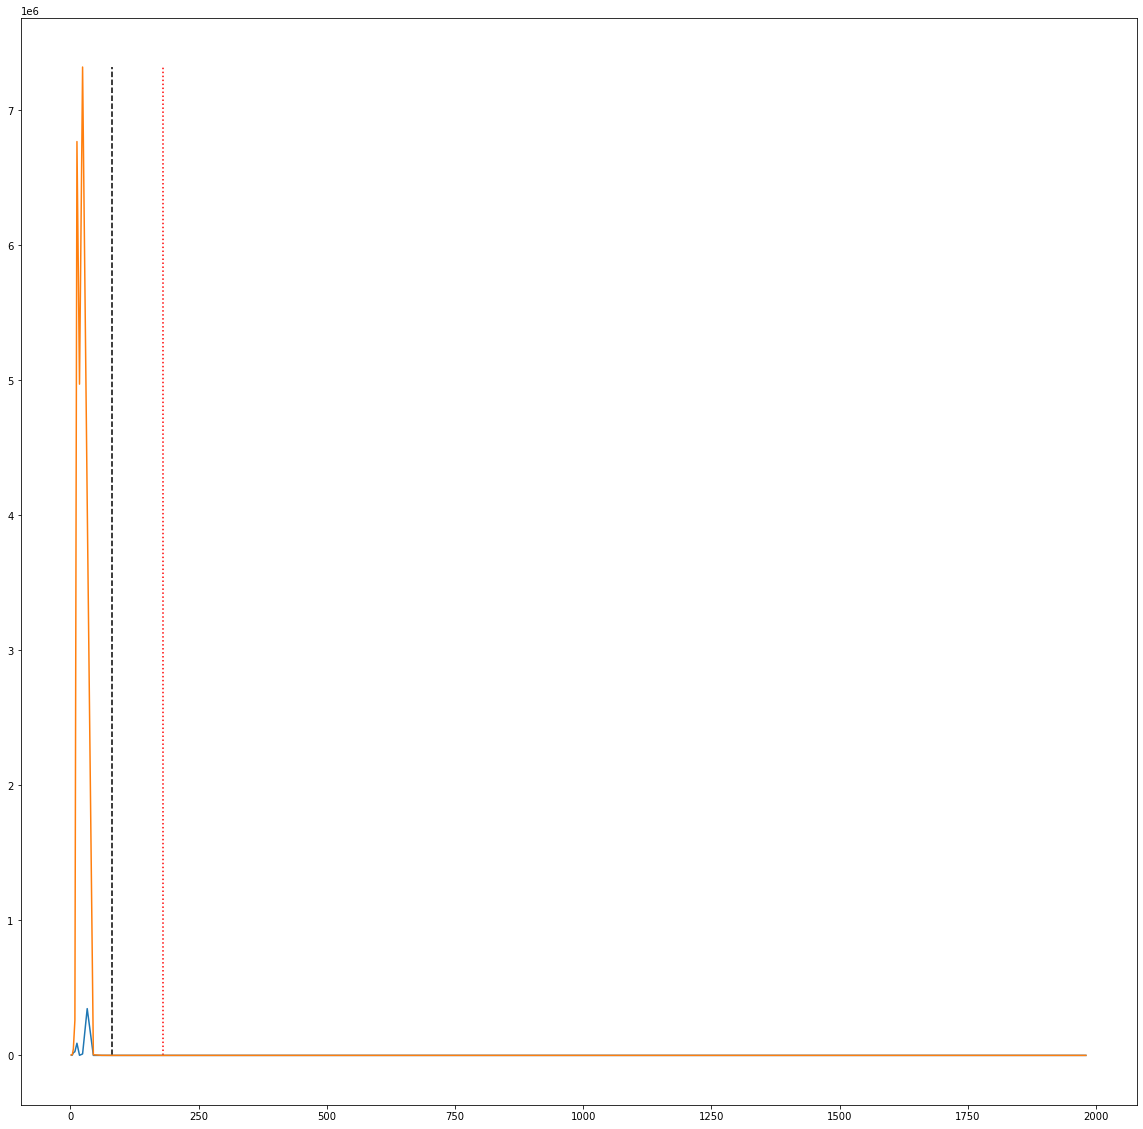

In [45]:
thresh = list(zip(*list(best_model.thresh.values())))
plt.figure(figsize=(20, 20))
plt.plot(lengths[:-1], thresh[0])
plt.plot(lengths[:-1], thresh[1])
plt.vlines(m*0.9, 0, max(max(thresh[0]), max(thresh[1])), linestyles="dotted", colors="red")
plt.vlines(best_model.n_best, 0, max(max(thresh[0]), max(thresh[1])), linestyles="dashed", colors="black")

In [46]:
best_model_r, train_mses_r, val_mses_r, _ = shrimp(Xtr, Ytr, orderCands=[q], verbose=0, N=1000, random=True)
w_shrimp = np.zeros(2*best_model_r.W.shape[0])
w_shrimp[best_model_r.id_list] = best_model_r.w
Atr = make_A(Xtr, best_model_r.W)
w_l2 = l2(Atr, Ytr)
Ate = make_A(Xte, best_model_r.W)
err_shrimp = np.sum((Yte-Ate@w_shrimp)**2)/len(Yte)
err_l2 = np.sum((Yte-Ate@w_l2)**2)/len(Yte)

In [47]:
print("Min l2: {}".format(err_l2))
print("SHRIMP: {}".format(err_shrimp))

Min l2: 0.3903957916408392
SHRIMP: 0.3040630877271094


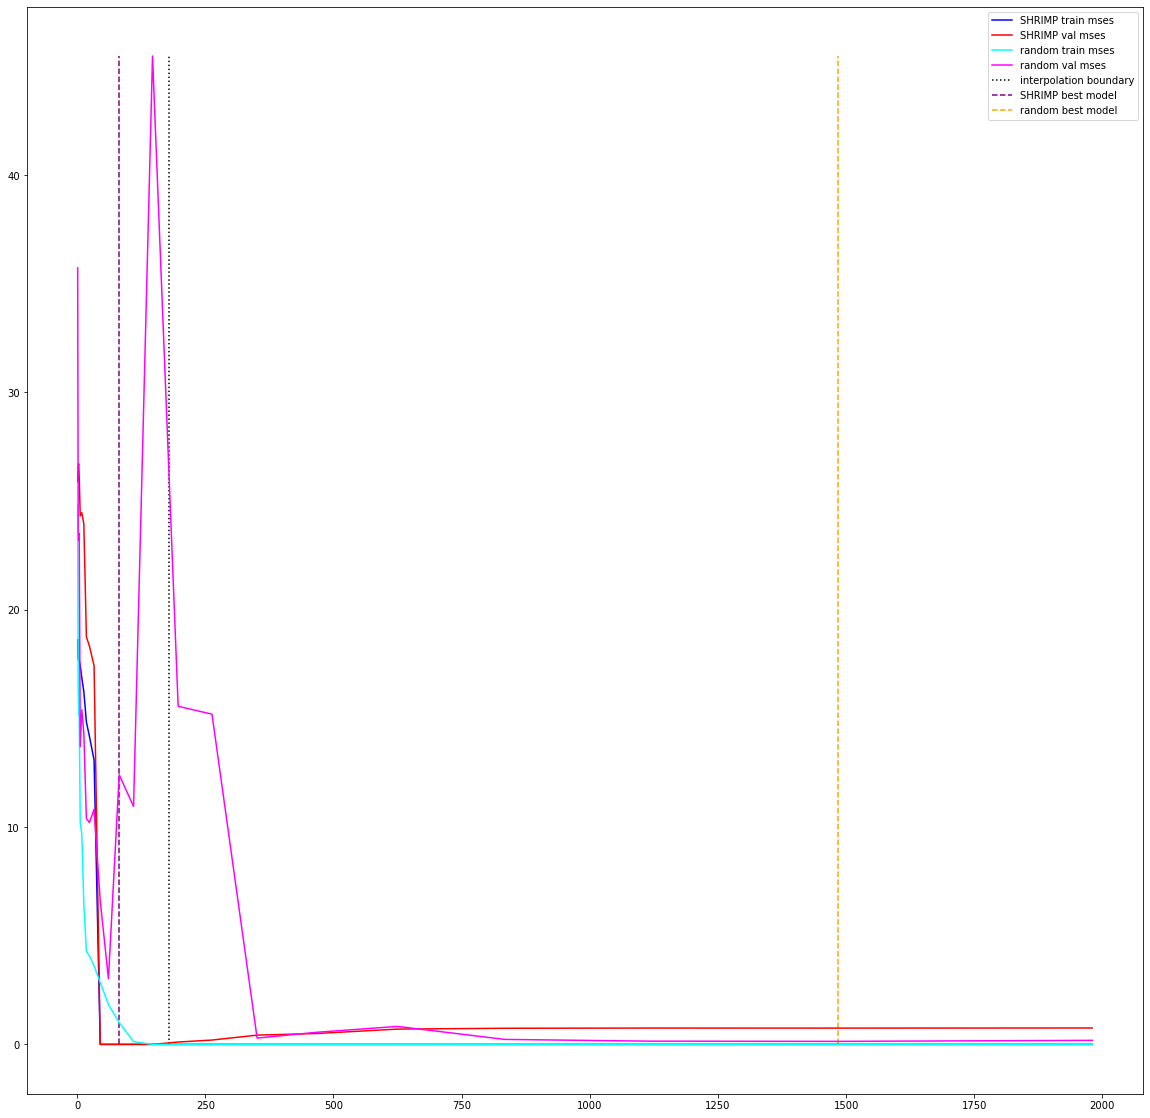

In [48]:
plt.figure(figsize=(20, 20))
plt.plot(lengths, train_mses[q], label="SHRIMP train mses", color="blue")
plt.plot(lengths, val_mses[q], label="SHRIMP val mses", color="red")
plt.plot(lengths, train_mses_r[q], label="random train mses", color="cyan")
plt.plot(lengths, val_mses_r[q], label="random val mses", color="magenta")
plt.vlines(m*0.9, 0, max(max(train_mses[q]), max(val_mses[q]), max(train_mses_r[q]), max(val_mses_r[q])), linestyles="dotted", colors="black", label="interpolation boundary")
plt.vlines(best_model.n_best, 0, max(max(train_mses[q]), max(val_mses[q]), max(train_mses_r[q]), max(val_mses_r[q])), linestyles="dashed", colors="purple", label="SHRIMP best model")
plt.vlines(best_model_r.n_best, 0, max(max(train_mses[q]), max(val_mses[q]), max(train_mses_r[q]), max(val_mses_r[q])), linestyles="dashed", colors="orange", label="random best model")
plt.legend(loc="best")
plt.show()